In [29]:
## Optical Materials
## Going through Chapter 6 of Chrostowki's and Hochberg's Si Ph Design Cpt 6


In [40]:
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import numpy as np
from scipy.constants import c
import matplotlib.cm as cm

In [41]:
line_w = 2
colors = cm.plasma(np.linspace(0.1, 0.9, 6)) 

### Silicon Wavelength dependence

In [45]:
# Simpliest dependence is first-order dependence of −7.6 × 10−5 nm−1


In [46]:
display(Math(r"n^2(\lambda) = \epsilon + \frac{\epsilon_{Lorentz}\omega^2_0}{\omega^2_0 - 2i\delta_02\pi \frac{c}{\lambda}-(\frac{2\pi c}{\lambda})^2}"))

<IPython.core.display.Math object>

In [53]:
eps = 7.9874
eps_Lorentz = 3.6880
omega_o = 3.9238*10**15
delta_o = 0 
wl = np.linspace(1.0, 2, 100)
n_lam = np.ones_like(wl) 
n_lam = np.sqrt(eps + (eps_Lorentz*omega_o**2)/(omega_o**2 - 2j*np.pi*delta_o*2*np.pi*(c/(wl*10**(-6)))-(2*np.pi*c/(wl*10**(-6)))**2))

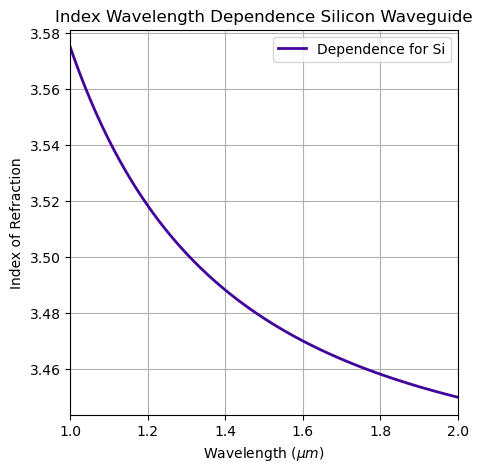

In [56]:
plt.figure(figsize=(5,5))
plt.plot(wl, n_lam, label="Dependence for Si", color=colors[0], linewidth=line_w)

# Add labels and title
plt.xlabel(r"Wavelength ($\mu m$)")
plt.ylabel("Index of Refraction")
plt.title("Index Wavelength Dependence Silicon")

#limits
plt.xlim(1,2)
# plt.ylim(3.46,3.54)

# Add a grid and legend
plt.grid(True)
plt.legend()


# Show the plot
plt.show()


In [58]:
### Look at Temperature Dependence

In [67]:
wl = 1.55
n_lam_25 = np.sqrt(eps + (eps_Lorentz*omega_o**2)/(omega_o**2 - 2j*np.pi*delta_o*2*np.pi*(c/(wl*10**(-6)))-(2*np.pi*c/(wl*10**(-6)))**2))
print(n_lam_25.real)

3.4737155638654027


In [72]:
#Tempature Dependence = Beta
dn_dt_Si = 5.2*10**(-5) # K^-1 @ 1550 nm 
T_F = np.linspace(-40, 100, 200) #-25 C to 25 C
T_C = (T_F-32)*5/9
T_K = T_C + 273.15
print("From: ", T_F[0], "to", np.round(T_F[-1],2), "F")
print("From: ", T_C[0], "to", np.round(T_C[-1],2), "C")
T_offset = n_lam_25.real-(25+273.15)*dn_dt_Si
n_lam_T = T_K*dn_dt_Si+T_offset


From:  -40.0 to 100.0 F
From:  -40.0 to 37.78 C


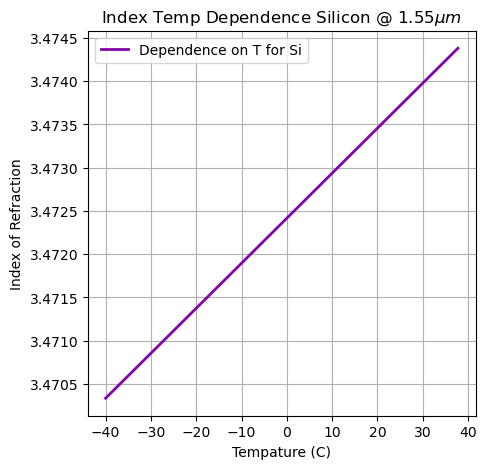

In [74]:
# Linear Approximation
plt.figure(figsize=(5,5))
plt.plot(T_C, n_lam_T, label="Dependence on T for Si", color=colors[1], linewidth=line_w)

# Add labels and title
plt.xlabel("Tempature (C)")
plt.ylabel("Index of Refraction")
plt.title(r"Index Temp Dependence Silicon @ 1.55$\mu m$")

#limits
# plt.xlim(1,2)
# plt.ylim(3.46,3.54)

# Add a grid and legend
plt.grid(True)
plt.legend()


# Show the plot
plt.show()


### Silicon Dioxide 

In [ ]:
# nearly constant index of refraction around 1.444 at 1550 nm (material dispersion is about 6× lower
# than in silicon, i.e. −1.2×10−5 nm−1). . Silicon dioxide’s temperature dependence is also 6.3×
# lower than silicon [10].



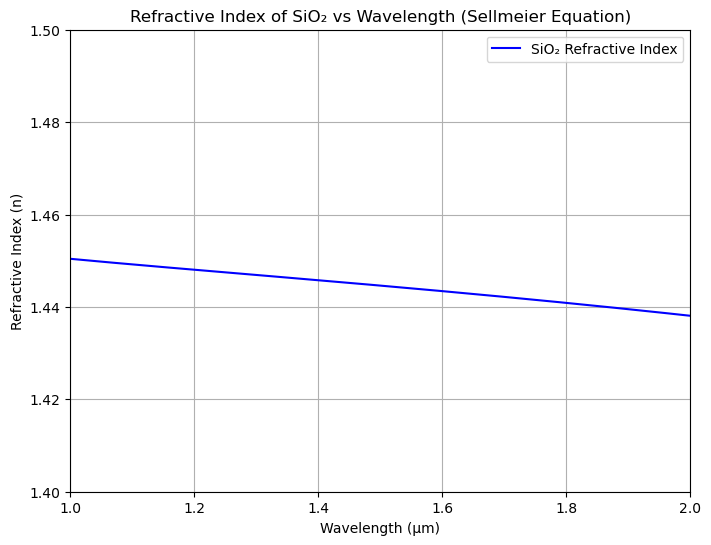

In [89]:
# https://refractiveindex.info/?shelf=main&book=SiO2&page=Malitson


# Sellmeier equation coefficients for SiO2
B1, C1 = 0.6961663, 0.0684043
B2, C2 = 0.4079426, 0.1162414
B3, C3 = 0.8974794, 9.896161

# Wavelength range (in micrometers)
wl = np.linspace(1,2, 1000)
# wl = wl_um*10**(-6)

# Compute refractive index for the given wavelength range
n_SiO2 = (1+0.6961663/(1-(0.0684043/wl)**2)+0.4079426/(1-(0.1162414/wl)**2)+0.8974794/(1-(9.896161/wl)**2))**.5

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(wl_um, n_SiO2, label="SiO₂ Refractive Index", color=colors[2])

# Labels and title
plt.xlabel("Wavelength (µm)")
plt.ylabel("Refractive Index (n)")
plt.title("Refractive Index of SiO₂ vs Wavelength (Sellmeier Equation)")

#limits
plt.xlim(1,2)
plt.ylim(1.4,1.5)

# Display the plot
plt.legend()
plt.grid(True)
plt.show()


In [91]:
### Look at Temperature Dependence

In [93]:
wl = 1.55
n_SiO2_25 = (1+0.6961663/(1-(0.0684043/wl)**2)+0.4079426/(1-(0.1162414/wl)**2)+0.8974794/(1-(9.896161/wl)**2))**.5


In [95]:
# Linear Approximation
# reported between 7.5 × 10−6 to around 11.5 × 10−6

#Tempature Dependence = Beta
dn_dt_SiO2 = 9*10**(-6) # K^-1 @ 1550 nm 
T_F = np.linspace(-40, 100, 200) #-25 C to 25 C
T_C = (T_F-32)*5/9
T_K = T_C + 273.15
print("From: ", T_F[0], "to", np.round(T_F[-1],2), "F")
print("From: ", T_C[0], "to", np.round(T_C[-1],2), "C")
T_offset = n_SiO2_25-(25+273.15)*dn_dt_SiO2
n_lam_T_sio2 = T_K*dn_dt_SiO2+T_offset



From:  -40.0 to 100.0 F
From:  -40.0 to 37.78 C


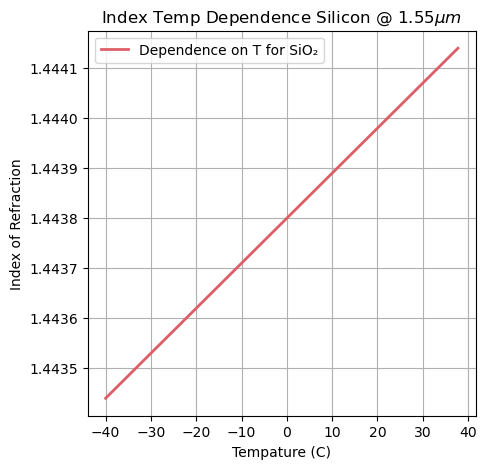

In [96]:
# Linear Approximation
plt.figure(figsize=(5,5))
plt.plot(T_C, n_lam_T_sio2, label="Dependence on T for SiO₂", color=colors[3], linewidth=line_w)

# Add labels and title
plt.xlabel("Tempature (C)")
plt.ylabel("Index of Refraction")
plt.title(r"Index Temp Dependence Silicon @ 1.55$\mu m$")

#limits
# plt.xlim(1,2)
# plt.ylim(3.46,3.54)

# Add a grid and legend
plt.grid(True)
plt.legend()


# Show the plot
plt.show()


In [ ]:
# Getting very accurate with index as a function of tempature can get rather complicated
# https://www.mdpi.com/1424-8220/23/13/6023


![SiO₂ Temperature Dependence](./Figures/SiO2_tempdependence.jpg)
